# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

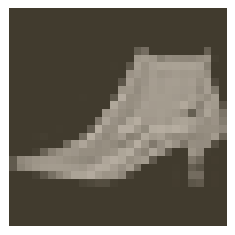

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [16]:
images[0].shape

torch.Size([1, 28, 28])

In [23]:
images.size()

torch.Size([64, 1, 28, 28])

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [25]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        # 1 input image channel, 
        # 6 output channels
        # 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(6 * 14 * 14, 120)  # 14*14 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        # Changes size from (1, 28, 28) to (6, 28, 28)
        x = self.pool(x)
        # Changes size from (6, 28, 28) to (6, 14, 14)
        x = x.view(-1, self.num_flat_features(x))
        #Reshape data to input to the input layer of the neural net
        #Size changes from (6, 14, 14) to (1, 1176)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1176, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [31]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [32]:
# TODO: Train the network here
epochs: int = 3
print_loss: int = 30
step: int = 0

for e in range(epochs):
    print(f'''Running epoch: {e}''')
    running_loss: float = 0.0
    for images, labels in iter(trainloader):
        step += 1
        optimizer.zero_grad()
        
        output = net.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if step % print_loss == 0:
            print(f'''Loss: {running_loss/print_loss}''')
            running_loss = 0

Running epoch: 0
Loss: 2.2975812435150145
Loss: 2.2815648635228474
Loss: 2.2687084833780924
Loss: 2.2467698017756144
Loss: 2.2097573280334473
Loss: 2.1453967253367106
Loss: 2.031596918900808
Loss: 1.8448954145113627
Loss: 1.6262229323387145
Loss: 1.4097031831741333
Loss: 1.2652233242988586
Loss: 1.1119597911834718
Loss: 0.9922839721043905
Loss: 0.9479679981867473
Loss: 0.9034932414690654
Loss: 0.8067387918631236
Loss: 0.8030556281407674
Loss: 0.7758240044116974
Loss: 0.7748076140880584
Loss: 0.7366531312465667
Loss: 0.7657708982626598
Loss: 0.7584661245346069
Loss: 0.7193971971670786
Loss: 0.712897785504659
Loss: 0.6711361368497213
Loss: 0.6698016663392384
Loss: 0.6387000262737275
Loss: 0.6677338004112243
Loss: 0.6739308754603068
Loss: 0.6302365402380625
Loss: 0.6484778344631195
Running epoch: 1
Loss: 0.4806691567103068
Loss: 0.664670945207278
Loss: 0.604243419567744
Loss: 0.6409140914678574
Loss: 0.6365288257598877
Loss: 0.6118223438660304
Loss: 0.5669611632823944
Loss: 0.609899334112

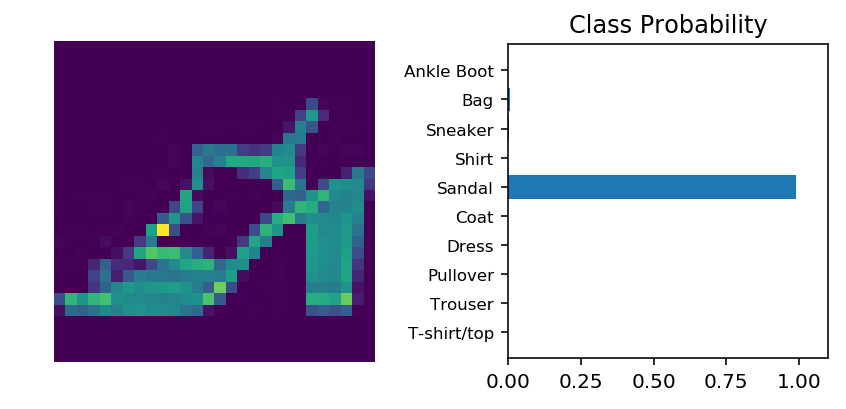

In [46]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[10]

# TODO: Calculate the class probabilities (softmax) for img
img.unsqueeze_(0)
with torch.no_grad():
    logits = net.forward(img)
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.